# KILT-4-2-EvaluationOnPositionContextsize

- Evalutaion on FiD results on KILT NQ using (BM25/Random) Samples
    - By Position
    - By Number of Context

In [27]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


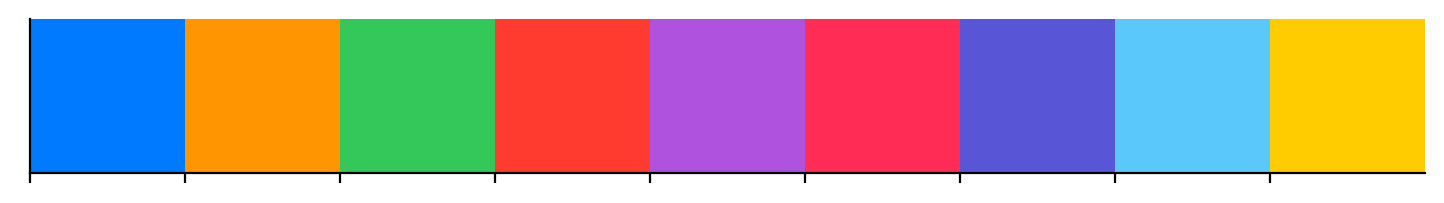

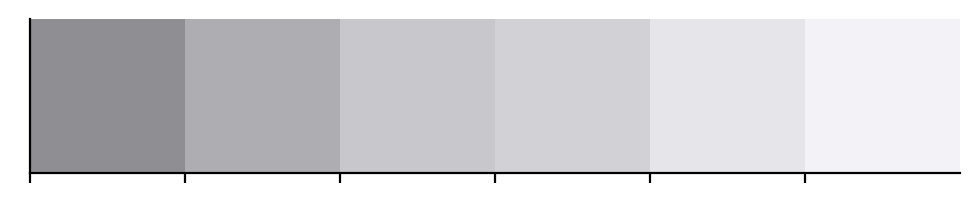

In [29]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [30]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [31]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [32]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [33]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/KILTNQ_fid_randomnegatives.pdf'
# title = 'EM score on ramdom damaging passages'

# # 'EM & AcEM score on ramdom damaging passages'

# # ./img/KILTNQ_fid_bm25negatives_upperbound.pdf

# # plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# # title = 'New FiD result on random sampling negative nq dev subsets'

## KILT Random Sampling NQ negative 

In [34]:
option = 'random'
path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

In [35]:
path = pathlib.Path(path)

In [36]:
# '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context5/final_output.txt'

In [37]:
files = path.glob('**/*.txt')
pprint(list(files))

[PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context3/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos4_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context2/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context5/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context3/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context1/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev

In [38]:
dict_eval = {
    'pos' : [],
    'ctx' : [],
    'em' : []
}

sample_size = 5
for pos in range(1, sample_size+1):
    for ctx in range(pos, sample_size+1):
    
#         # bm25 negative filenames
#         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

        # random sampling negative filenames
        if option == 'random':
            file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        # DPR should be changed to bm25
        if option == 'bm25':
            file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        
        print(test)
        
        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']
#         print(len(df))
        em = float(sum(df['em'])/len(df))
        
        dict_eval['pos'].append(pos)
        dict_eval['ctx'].append(ctx)
        dict_eval['em'].append(em)
        
        

/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context1/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context2/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context3/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context4/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context5/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context2/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context3/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context4/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context5/final_output.txt
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context3/final_output.txt


In [ ]:
file_lst = [
    '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context1/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context2/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context3/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context4/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context5/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context2/final_output.txt']

In [ ]:
# for index, file_ in enumerate(file_lst,1):
#     em_index = f'em_{index}'
#     columns = ['id','inference',em_index]
    
#     if index == 1:
#         df = pd.read_csv(file_, sep = '\t', header=None)
#         df.columns = columns
#     else:
#         df_ad = pd.read_csv(file_, sep = '\t', header=None)
#         df_ad.columns = columns
#         df[em_index] = df_ad[em_index].values
        
# print(df)
# #        
    
    

In [ ]:
# base_pd = df[df.em_1==True]

In [ ]:
# sum(base_pd.em_1 == False)/len(base_pd)

In [ ]:
# sum(base_pd.em_2 == False)/len(base_pd)

In [ ]:
# sum(base_pd.em_3 == False)/len(base_pd)

In [ ]:
# sum(base_pd.em_4 == False)/len(base_pd)

In [ ]:
# sum(base_pd.em_5 == False)/len(base_pd)

In [ ]:
# /data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context1/final_output.txt
list_1 = ['/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context2/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context2/final_output.txt']

list_2 = ['/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context3/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context3/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context3/final_output.txt']

list_3 = ['/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context4/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context4/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context4/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos4_context4/final_output.txt']

list_4 = ['/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context5/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context5/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos3_context5/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos4_context5/final_output.txt',
'/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos5_context5/final_output.txt']

In [ ]:
# def matching(file_lst):
#     for index, file_ in enumerate(file_lst,1):
#         em_index = f'em_{index}'
#         columns = ['id','inference',em_index]

#         if index == 1:
#             df = pd.read_csv(file_, sep = '\t', header=None)
#             df.columns = columns
#         else:
#             df_ad = pd.read_csv(file_, sep = '\t', header=None)
#             df_ad.columns = columns
#             df[em_index] = df_ad[em_index].values
            
#     base_pd = df[df.em_1==True]
    
#     return base_pd
    
    

In [ ]:
# base_pd = matching(list_1)

In [ ]:
# def compare(base_pd):
#     columns = base_pd.columns
#     for col_name in columns:
#         if col_name == 'em_1':
#             print(col_name)
#         elif 'em' in col_name:
#             print(col_name)
#             print(sum(base_pd[col_name] == True))
#             print(len(base_pd))

In [ ]:
# for test_lst in [list_1, list_2, list_3, list_4]:
#     base_pd = matching(test_lst)
#     compare(base_pd)
#     print('---')

In [ ]:
# compare(base_pd)

In [ ]:
# sum(base_pd.em_6 == False)

In [ ]:
# sum(df.em_2 == df.em_6)

In [12]:
for pos in range(1, sample_size+1):
    for ctx in range(pos, sample_size+1):
    
#         # bm25 negative filenames
#         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

        # random sampling negative filenames
        if option == 'random':
            file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        # DPR should be changed to bm25
        if option == 'bm25':
            file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        
        print(test)
        
        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']
        print(len(df))
        em = float(sum(df['em'])/len(df))
        
        dict_eval['pos'].append(pos)
        dict_eval['ctx'].append(ctx)
        dict_eval['em'].append(em)

/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context1/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context2/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context3/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context4/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos1_context5/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context2/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context3/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context4/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kilt_rand_nq_dev_pos2_context5/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ/kil

In [ ]:
# test

In [39]:
df = pd.DataFrame(data=dict_eval)
# print(dict_eval)

pos_set = set(df['pos'])

In [40]:
from cycler import cycler
# marker='*',
# default_cycler = (cycler(markers=['1', '2', '3' ,'4','8']))
c = plt.cycler(color=["Blue", "Orange", "Green",'Red','Purple'],
               markersize=[10, 10, 10, 10, 10],
               marker=["o", "s", "^", '1', '3'])
plt.rcParams["axes.prop_cycle"] = c

# plt.rc('axes', prop_cycle=default_cycler)

In [41]:
df

,pos,ctx,em
0,1,1,0.678614
1,1,2,0.681371
2,1,3,0.682158
3,1,4,0.683734
4,1,5,0.682946
5,2,2,0.681371
6,2,3,0.682158
7,2,4,0.683734
8,2,5,0.682946
9,3,3,0.682158


In [42]:
# plot_path = './img/KILTNQ_fid_randomnegatives.pdf'

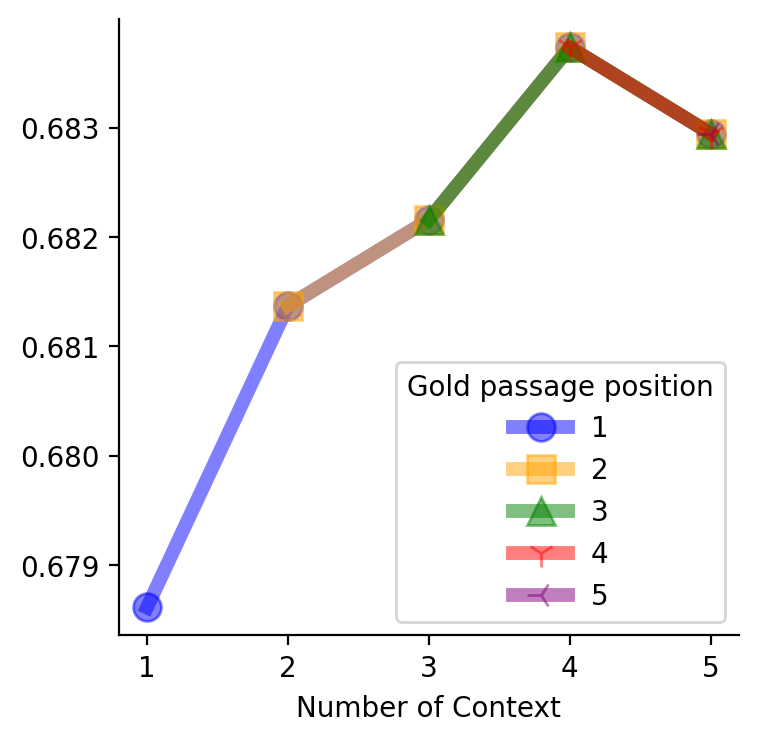

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xticks(sorted(list(pos_set)))
for pos in pos_set:
    selected_data = df.loc[df['pos'] == pos]
#     print(selected_data)
    ax.plot(selected_data['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
    
# ax.set_title('FiD result on BM25 hard negative nq dev subsets')
# ax.set_title(title)
ax.legend(title='Gold passage position', fontsize = 'medium', loc='lower right')
plt.xlabel('Number of Context')
# plt.savefig(plot_path, format="pdf", bbox_inches="tight")
plt.show()